In [ ]:
# encoding=utf-8
import openpyxl
wb = openpyxl.Workbook()
wb = openpyxl.load_workbook("全部词频-筛选.xlsx")
sh = wb['Sheet1']
cons=[]
new_sen = []
for cases in list(sh.rows)[0:664]:
    case_A = cases[0].value
    cons.append(case_A)
#print(cons)

f1 = open('全部摘要数据-剔除.txt','r',encoding = 'utf-8')
sens = f1.readlines()
#print(sens)

f2 = open("剔除.txt",'w',encoding = 'utf-8')
for i in range(len(sens)):
    for j in range(len(cons)):
        if str(cons[j]) in sens[i].split(" "):
            sens[i] = sens[i].replace(cons[j],"")
    f2.write(str(sens[i]).strip()+"\n")
    #print(sens[i]) 
f2.close()

# 读取分词后的摘要数据，获得30主题及主题词

In [6]:
from gensim import corpora, models, similarities
f1 = open('剔除.txt','r',encoding = 'utf-8')
cons = f1.readlines()
chaplist=[]
for con in cons:
    sen1 = list(con.strip().split(" "))
    chaplist.append(sen1)
print(len(chaplist))

93537


In [7]:
num_topics = 45#####
f1 = open("1-45multi10主题random5.txt",'w',encoding = 'utf-8')
dictionary = corpora.Dictionary(chaplist)
corpus = [dictionary.doc2bow(text) for text in chaplist]  # corpus里面的存储格式（0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)
#corpora.MmCorpus.serialize('corpus.mm', corpus)
lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=5,
                          num_topics=num_topics)  # random_state 等价于随机种子的random.seed()，使每次产生的主题一致

topic_list = lda.print_topics(num_topics, 15)
    
for topic in topic_list:
    f1.write(str(topic)+"\n")
    print(topic)
f1.close()

(0, '0.145*"force" + 0.099*"contact" + 0.032*"velocity" + 0.028*"friction" + 0.026*"transition" + 0.023*"arm" + 0.020*"response" + 0.015*"elastic" + 0.014*"grasp" + 0.013*"privacy" + 0.011*"supply" + 0.011*"state" + 0.011*"observer" + 0.010*"micro" + 0.010*"grasping"')
(1, '0.155*"image" + 0.024*"method" + 0.021*"recognition" + 0.012*"edge" + 0.011*"texture" + 0.011*"pixel" + 0.011*"pattern" + 0.010*"local" + 0.010*"region" + 0.009*"template" + 0.009*"database" + 0.008*"paper" + 0.007*"scale" + 0.007*"invariant" + 0.006*"scheme"')
(2, '0.039*"mechanism" + 0.037*"decision" + 0.024*"utility" + 0.024*"resource" + 0.021*"group" + 0.017*"market" + 0.017*"preference" + 0.017*"allocation" + 0.012*"measure" + 0.011*"outcome" + 0.011*"risk" + 0.011*"auction" + 0.011*"making" + 0.010*"social" + 0.010*"product"')
(3, '0.091*"control" + 0.037*"controller" + 0.030*"manipulator" + 0.025*"system" + 0.024*"joint" + 0.020*"feedback" + 0.020*"actuator" + 0.015*"robotic" + 0.015*"manipulation" + 0.014*"p

In [8]:
lb = open("2全部9w文章的各自45类别.txt",'w',encoding = 'utf-8')
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    lb.write(str(i[bz][0])+"\t"+str(i[bz][1])+"\n")
lb.close()

In [5]:
for num_topic in range(5,61,5):
    dictionary = corpora.Dictionary(chaplist)
    corpus = [dictionary.doc2bow(text) for text in chaplist]  # corpus里面的存储格式（0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)
    #corpora.MmCorpus.serialize('corpus.mm', corpus)
    lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=num_topic)  # random_state 等价于随机种子的random.seed()，使每次产生的主题一致
    coherence_model_lda = models.CoherenceModel(model=lda,texts=chaplist,dictionary=dictionary,coherence='c_v') 
    coherence_lda=coherence_model_lda.get_coherence() 
    print('\n全部数据主题数为'+str(num_topic) +'时的一致性分数为: ',coherence_lda)


全部数据主题数为5时的一致性分数为:  0.4659855017467914

全部数据主题数为10时的一致性分数为:  0.47718874970909847

全部数据主题数为15时的一致性分数为:  0.4765992517231636

全部数据主题数为20时的一致性分数为:  0.47437754302932716

全部数据主题数为25时的一致性分数为:  0.4690084752703425

全部数据主题数为30时的一致性分数为:  0.4493820331906251

全部数据主题数为35时的一致性分数为:  0.47330057576459583

全部数据主题数为40时的一致性分数为:  0.46081382052240655

全部数据主题数为45时的一致性分数为:  0.46929849229796783

全部数据主题数为50时的一致性分数为:  0.4451331783446285

全部数据主题数为55时的一致性分数为:  0.4490515009617554

全部数据主题数为60时的一致性分数为:  0.4431587065107998


##############################################################################

## 全领域数据绘图

- 9w多数据，30类，
- 节点数据好弄

# 找主题进行配对

1 先弄边再弄节点

2 我需要一个表格，里面仅包含主题词，如下图
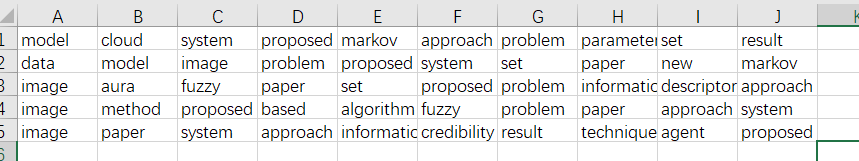


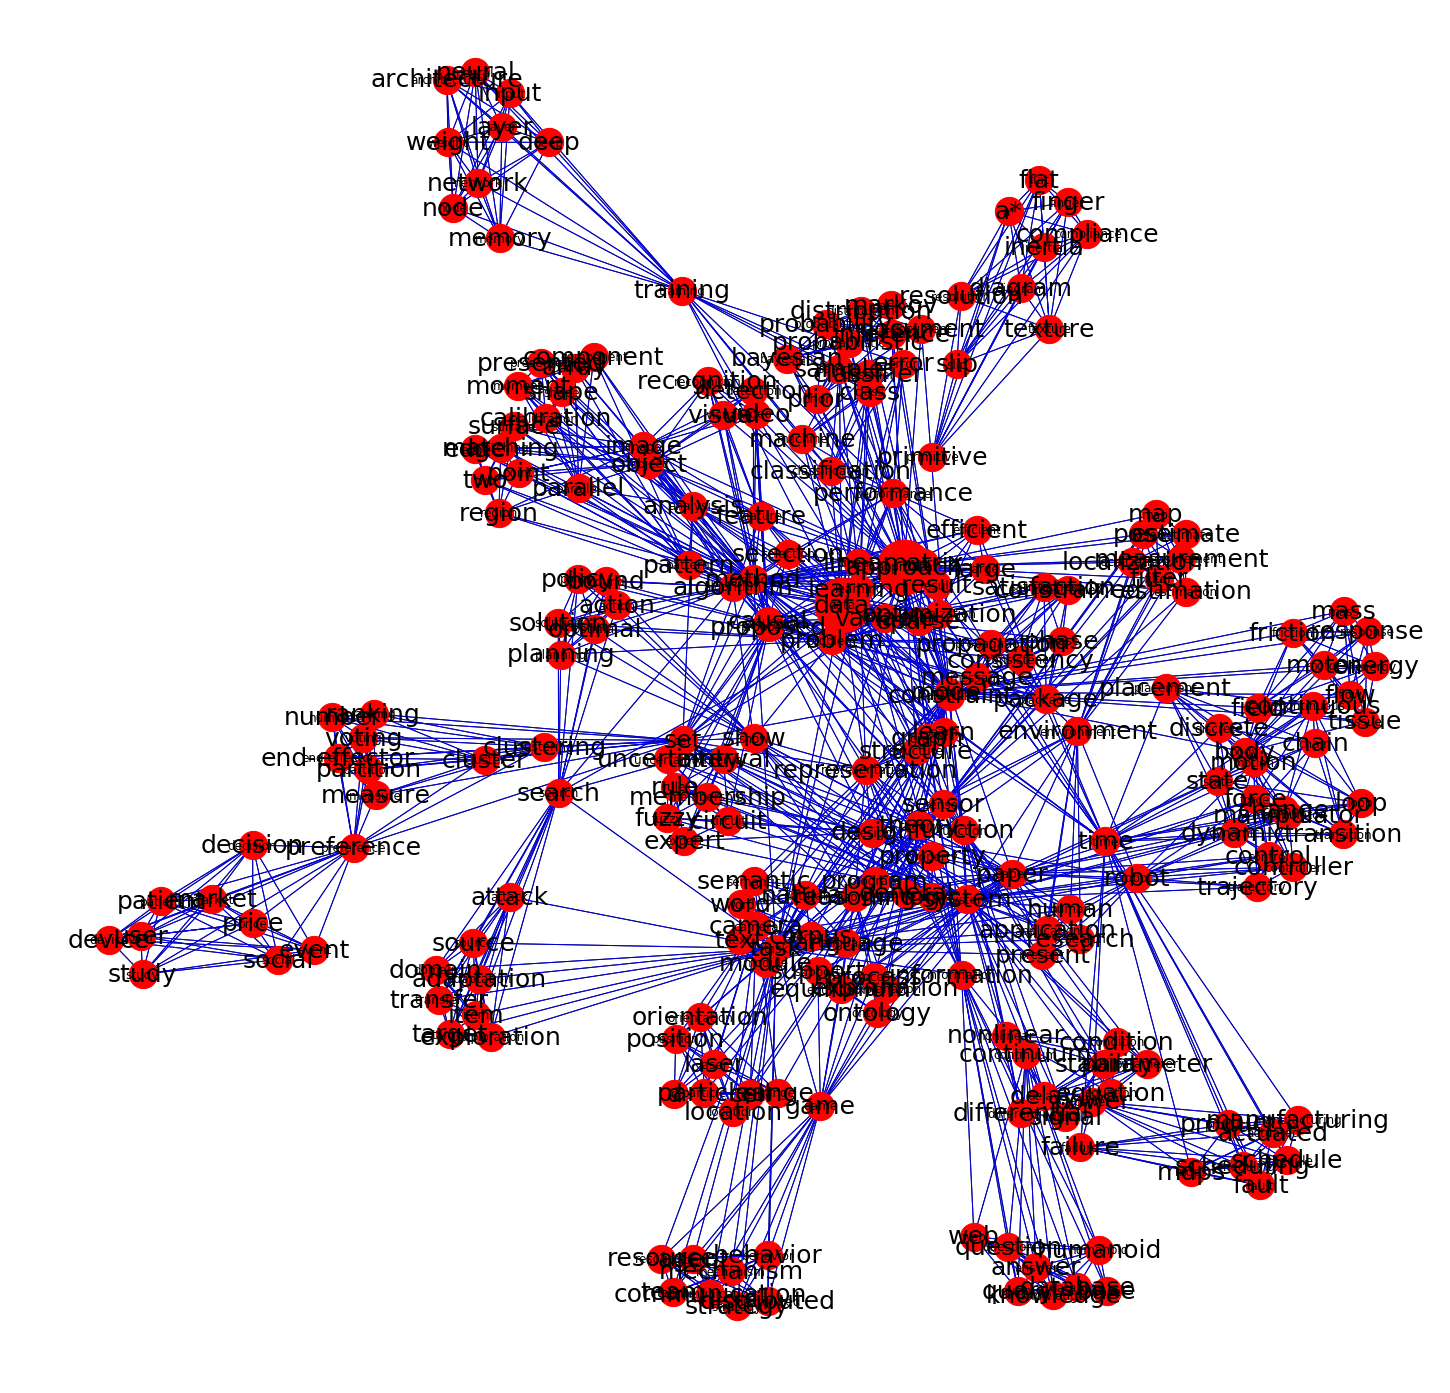

In [7]:
'''
import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(4) 
n_of_rows=sheet_1_by_index.nrows 
f1 = open(r'全部数据配对.txt','w',encoding = 'utf-8')
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    cc = list(itertools.combinations(danci, 2))
    f1.write(str(cc))
f1.close()

# 生成 边数据edge
# 需要以下这样的格式
# edge=[['model', 'learning'], ['model', 'task']]
f2 = open(r'全部数据配对.txt','r',encoding = 'utf-8')
con1 = f2.read().replace("), (","],[")
con2 = con1.replace(")][(","],[")
con3 = con2.replace("[(","[") #开头
con4 = con3.replace(")]","]") #结尾
a=eval(con4)
edge=list(a)
f2.close()

import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(4) 
n_of_rows=sheet_1_by_index.nrows 
list_set=[] 
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    list_set.append(danci)
new = sum(list_set,[])
node = list(set(new)) # 得到去重之后的全部单词，格式符合node节点！！！

#####################################################
# 生成外部文件格式
import networkx as nx

G=nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)
nx.write_gexf(G,'全部数据.gexf')
'''
#####################################################
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
network_file ='全部数据.gexf'
G = nx.read_gexf(path=network_file)
pos = nx.spring_layout(G,k=1.5*1/np.sqrt(len(G.nodes())), iterations=15)  
plt.figure(3, figsize=(25, 25))


nx.draw_networkx(G, pos=pos, nodelist=["approach", "data"], node_size=3000)
nx.draw_networkx_nodes(G, pos, node_size=800)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.9, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=25, font_color='black')
plt.axis('off')
plt.show()

In [15]:
betweenness_centrality = nx.betweenness_centrality(G, k=30) 
betweenness_centrality

{'a*': 0.0,
 'action': 0.0,
 'actuated': 0.0,
 'adaptation': 0.0,
 'agent': 0.0,
 'algorithm': 0.021385466277810343,
 'analysis': 0.007725040916530279,
 'answer': 0.0,
 'application': 0.0,
 'approach': 0.21715725032209854,
 'architecture': 0.0,
 'array': 0.0,
 'attack': 0.0,
 'base': 0.0,
 'bayesian': 0.0,
 'behavior': 0.0,
 'body': 0.0,
 'bound': 0.0,
 'calibration': 0.0,
 'camera': 0.0,
 'causal': 0.0,
 'cell': 0.0,
 'chain': 0.0,
 'change': 0.0,
 'circuit': 0.0,
 'class': 0.0,
 'classification': 0.0,
 'classifier': 0.0,
 'cluster': 0.0,
 'clustering': 0.0,
 'communication': 0.0,
 'compliance': 0.0,
 'component': 0.0,
 'condition': 0.0,
 'consistency': 0.0,
 'constrained': 0.0,
 'constraint': 0.0,
 'continuous': 0.0,
 'continuum': 0.0,
 'control': 0.0,
 'controller': 0.0,
 'corpus': 0.0,
 'd': 0.0,
 'data': 0.1487280703273611,
 'database': 0.0,
 'decision': 0.0,
 'deep': 0.0,
 'delay': 0.0,
 'design': 0.003752267534046039,
 'detection': 0.0,
 'device': 0.0,
 'diagram': 0.0,
 'differe

In [6]:
import matplotlib 
import numpy as np 
import xlrd 
import pandas as pd ##################################读取文件################################### 
# create sample documents 
path="测试-50篇文献.xlsx" 
data=xlrd.open_workbook(path) 
sheet_1_by_index=data.sheet_by_index(0) 
title=sheet_1_by_index.col_values(1) 
n_of_rows=sheet_1_by_index.nrows 
doc_set=[] 
for i in range(1,n_of_rows):
    doc_set.append(title[i]) #把题目串一起。

['Phasic triplet markov chains', 'Accelerating filtering techniques for numeric CSPs', 'Interacting behavioral Petri nets analysis for distributed causal model-based diagnosis', 'Dempster-Shafer Fusion of Evidential Pairwise Markov Chains', 'Unified Representation of Sets of Heterogeneous Markov Transition Matrices', 'Qualitative reasoning based on fuzzy relative orders of magnitude', 'Noninteracting adaptive control of PMSM using interval type-2 fuzzy logic systems', 'On Matrix Norms, Stability and Stabilization of a Class of Discrete Takagi-Sugeno Fuzzy Systems', 'Fuzzy Adaptive State-Feedback Control Scheme of Uncertain Nonlinear Multivariable Systems', 'A stable model-based fuzzy predictive control based on fuzzy dynamic programming', 'Genetic algorithm for the design of a class of fuzzy controllers: An alternative approach', 'Metacognitive Octonion-Valued Neural Networks as They Relate to Time Series Analysis', 'Nonlinear topological component analysis: Application to age-invarian

In [3]:
def format_topics_sentences(ldamodel, corpus, texts): 
    sent_topics_df = pd.DataFrame() 
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True) 
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num) 
                topic_keywords = ", ".join([word for word, prop in wp]) 
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4), topic_keywords]), ignore_index=True)
            else: 
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'] 
    contents = pd.Series(texts) 
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1) 
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(lda, corpus, doc_set) 
df_dominant_topic = df_topic_sents_keywords.reset_index() 
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib','Keywords', 'Text'] 
print(df_dominant_topic.head(10))
df_dominant_topic.to_csv("t1.csv",encoding="UTF-8",index=False ) 

# 期刊 k=20

In [3]:
from gensim import corpora, models, similarities
f1 = open('AB_abs_tokens.txt','r',encoding = 'utf-8')
cons = f1.readlines()
chaplistqikan=[]
for con in cons:
    sen1 = list(con.strip().split(" "))
    chaplistqikan.append(sen1)
print(len(chaplistqikan))

37926


In [6]:
for num_topic in range(5,60,5):
    dictionary = corpora.Dictionary(chaplistqikan)
    corpus = [dictionary.doc2bow(text) for text in chaplistqikan]  # corpus里面的存储格式（0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)
    #corpora.MmCorpus.serialize('corpus.mm', corpus)
    lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=num_topic)  # random_state 等价于随机种子的random.seed()，使每次产生的主题一致
    coherence_model_lda = models.CoherenceModel(model=lda,texts=chaplistqikan,dictionary=dictionary,coherence='c_v') 
    coherence_lda=coherence_model_lda.get_coherence() 
    print('\n期刊主题数为'+str(num_topic) +'时的一致性分数为: ',coherence_lda)


期刊主题数为5时的一致性分数为:  0.36319191314167176

期刊主题数为10时的一致性分数为:  0.3968521153662169

期刊主题数为15时的一致性分数为:  0.4027399626013692

期刊主题数为20时的一致性分数为:  0.4339912039800681

期刊主题数为25时的一致性分数为:  0.39909075099767927

期刊主题数为30时的一致性分数为:  0.42393329385862233

期刊主题数为35时的一致性分数为:  0.4169718420832771

期刊主题数为40时的一致性分数为:  0.40337946779596423

期刊主题数为45时的一致性分数为:  0.4005872547546199

期刊主题数为50时的一致性分数为:  0.4154254774057001

期刊主题数为55时的一致性分数为:  0.4016490813276396


In [4]:
num_topics = 20
f1 = open("期刊20主题multi10.txt",'w',encoding = 'utf-8')
dictionary = corpora.Dictionary(chaplistqikan)
corpus = [dictionary.doc2bow(text) for text in chaplistqikan]  # corpus里面的存储格式（0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)
lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=num_topics)  # random_state 等价于随机种子的random.seed()，使每次产生的主题一致

topic_list = lda.print_topics(num_topics, 10)
    #return lda, dictionary
    
for topic in topic_list:
    f1.write(str(topic)+"\n")
    print(topic)
f1.close()

(0, '0.041*"model" + 0.024*"learning" + 0.016*"task" + 0.011*"approach" + 0.010*"domain" + 0.007*"word" + 0.007*"action" + 0.006*"problem" + 0.006*"data" + 0.006*"representation"')
(1, '0.061*"feature" + 0.020*"classification" + 0.020*"kernel" + 0.018*"vector" + 0.016*"data" + 0.015*"space" + 0.014*"recognition" + 0.014*"method" + 0.014*"pattern" + 0.011*"analysis"')
(2, '0.018*"error" + 0.016*"probability" + 0.016*"character" + 0.013*"estimation" + 0.013*"algorithm" + 0.012*"distribution" + 0.011*"estimator" + 0.010*"problem" + 0.010*"result" + 0.010*"estimate"')
(3, '0.054*"function" + 0.020*"model" + 0.014*"linear" + 0.013*"approximation" + 0.011*"parameter" + 0.010*"result" + 0.007*"paper" + 0.007*"number" + 0.007*"equation" + 0.007*"problem"')
(4, '0.019*"model" + 0.018*"graph" + 0.009*"algorithm" + 0.009*"problem" + 0.008*"two" + 0.008*"structure" + 0.007*"bayesian" + 0.007*"measure" + 0.007*"flow" + 0.007*"matching"')
(5, '0.028*"data" + 0.024*"learning" + 0.024*"method" + 0.019

In [18]:
import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
f1 = open(r'期刊配对.txt','w',encoding = 'utf-8')
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    cc = list(itertools.combinations(danci, 2))
    f1.write(str(cc))
f1.close()

# 生成 边数据edge
# 需要以下这样的格式
# edge=[['model', 'learning'], ['model', 'task']]
f2 = open(r'期刊配对.txt','r',encoding = 'utf-8')
con1 = f2.read().replace("), (","],[")
con2 = con1.replace(")][(","],[")
con3 = con2.replace("[(","[") #开头
con4 = con3.replace(")]","]") #结尾
a=eval(con4)
edge=list(a)
f2.close()
print(len(edge))

900


138


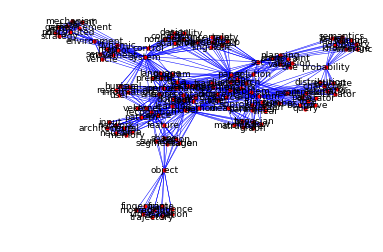

In [3]:
import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
f1 = open(r'期刊配对.txt','w',encoding = 'utf-8')
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    cc = list(itertools.combinations(danci, 2))
    f1.write(str(cc))
f1.close()

# 生成 边数据edge
# 需要以下这样的格式
# edge=[['model', 'learning'], ['model', 'task']]
f2 = open(r'期刊配对.txt','r',encoding = 'utf-8')
con1 = f2.read().replace("), (","],[")
con2 = con1.replace(")][(","],[")
con3 = con2.replace("[(","[") #开头
con4 = con3.replace(")]","]") #结尾
a=eval(con4)
edge=list(a)
f2.close()
#print(len(edge))

import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
list_set=[] 
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    list_set.append(danci)
new = sum(list_set,[])
node = list(set(new)) # 得到去重之后的全部单词，格式符合node节点！！！
print(len(node))

#####################################################
# 生成外部文件格式
import networkx as nx

G=nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)
nx.write_gexf(G,'期刊.gexf')

#####################################################
import matplotlib.pyplot as plt
network_file ='期刊.gexf'
G = nx.read_gexf(path=network_file)
#print(G.nodes()) #  测试
#print(G.edges()) #  测试 
pos = nx.spring_layout(G)  

nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=1, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=9, font_color='k')
plt.axis('off')
plt.show()

# 会议 k=15

In [6]:
from gensim import corpora, models, similarities
f1 = open('AB_conf_abs_tokens.txt','r',encoding = 'utf-8')
cons = f1.readlines()
chaplisthuiyi=[]
for con in cons:
    sen1 = list(con.strip().split(" "))
    chaplisthuiyi.append(sen1)
print(len(chaplisthuiyi))

55611


In [4]:
for num_topic in range(5,60,5):
    dictionary = corpora.Dictionary(chaplisthuiyi)
    corpus = [dictionary.doc2bow(text) for text in chaplisthuiyi]  # corpus里面的存储格式（0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)
    #corpora.MmCorpus.serialize('corpus.mm', corpus)
    lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=num_topic)  # random_state 等价于随机种子的random.seed()，使每次产生的主题一致
    coherence_model_lda = models.CoherenceModel(model=lda,texts=chaplisthuiyi,dictionary=dictionary,coherence='c_v') 
    coherence_lda=coherence_model_lda.get_coherence() 
    print('\n会议主题数为'+str(num_topic) +'时的一致性分数为: ',coherence_lda)


会议主题数为5时的一致性分数为:  0.41778829026888487

会议主题数为10时的一致性分数为:  0.4456149097090624

会议主题数为15时的一致性分数为:  0.4828330587805089

会议主题数为20时的一致性分数为:  0.4630486820810278

会议主题数为25时的一致性分数为:  0.4547055217445022

会议主题数为30时的一致性分数为:  0.44576393512324264

会议主题数为35时的一致性分数为:  0.4253142642851894

会议主题数为40时的一致性分数为:  0.4383995886959721

会议主题数为45时的一致性分数为:  0.4247572395870585

会议主题数为50时的一致性分数为:  0.43731889926968726

会议主题数为55时的一致性分数为:  0.41569330100625107


In [7]:
num_topics = 15
f1 = open("会议15主题multi10.txt",'w',encoding = 'utf-8')
dictionary = corpora.Dictionary(chaplisthuiyi)
corpus = [dictionary.doc2bow(text) for text in chaplisthuiyi]  # corpus里面的存储格式（0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)
lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=num_topics)  # random_state 等价于随机种子的random.seed()，使每次产生的主题一致

topic_list = lda.print_topics(num_topics, 10)
    #return lda, dictionary
    
for topic in topic_list:
    f1.write(str(topic)+"\n")
    print(topic)
f1.close()

(0, '0.058*"query" + 0.026*"tree" + 0.010*"table" + 0.008*"open-loop" + 0.008*"index" + 0.007*"anomaly" + 0.007*"string" + 0.007*"algorithm" + 0.007*"tweet" + 0.006*"saving"')
(1, '0.037*"robot" + 0.018*"control" + 0.017*"system" + 0.012*"motion" + 0.011*"sensor" + 0.010*"paper" + 0.009*"environment" + 0.008*"method" + 0.008*"result" + 0.007*"present"')
(2, '0.025*"language" + 0.016*"system" + 0.011*"paper" + 0.009*"question" + 0.009*"knowledge" + 0.009*"program" + 0.008*"logic" + 0.008*"natural" + 0.007*"present" + 0.007*"answer"')
(3, '0.065*"agent" + 0.046*"human" + 0.023*"behavior" + 0.022*"interaction" + 0.019*"team" + 0.016*"social" + 0.011*"group" + 0.010*"communication" + 0.009*"task" + 0.009*"coordination"')
(4, '0.037*"force" + 0.032*"actuator" + 0.022*"design" + 0.018*"device" + 0.017*"stiffness" + 0.015*"leg" + 0.014*"soft" + 0.012*"actuation" + 0.012*"mechanism" + 0.010*"mechanical"')
(5, '0.017*"image" + 0.016*"feature" + 0.013*"method" + 0.013*"data" + 0.013*"object" + 0

# 计算中国近10年的中介中心度

In [ ]:
    z2010 = [5,83,206,38,19,12,7,17,8,83,99,21,15,129,76,7,168,5,49,78,0,0,156,20,52,4,28,30,38,74]
    z2011 = [8,101,236,47,19,16,8,21,9,107,121,25,20,142,99,8,227,5,50,86,0,1,191,24,55,5,29,36,40,106]
z2011 = [10,119,279,57,27,18,8,23,9,129,166,26,21,158,119,9,245,6,54,87,0,2,245,30,66,5,39,48,41,134]# 2012
z2011 = [12,145,344,73,34,22,8,28,10,155,210,28,23,174,153,11,267,12,56,92,0,2,315,40,79,5,48,65,45,189] #2013
z2011 = [13,170,421,88,41,28,8,33,13,195,273,32,32,183,177,14,328,16,60,97,0,2,383,45,99,5,56,85,47,253] #2014
z2011 = [15,200,531,100,47,40,13,36,13,247,354,40,50,197,226,14,367,20,65,112,0,2,478,74,127,7,76,109,55,396]#2015

#2016
z2011 = [18,230,691,128,57,56,19,41,18,311,421,49,65,221,274,23,407,27,68,132,0,2,582,103,152,10,97,135,61,584]

#2017
z2011 = [23,270,894,154,70,68,26,50,28,380,501,60,75,252,341,28,469,34,70,176,1,2,720,141,175,13,121,177,72,825]

#2018 
z2011 =[29,311,1154,191,92,93,28,57,29,463,658,89,100,282,418,29,589,49,74,203,2,2,870,182,223,16,149,215,81,1213]

#2019
z2011 =[36,336,1428,224,112,97,29,63,35,547,741,106,132,311,482,35,681,56,78,237,3,2,1001,202,261,18,177,239,91,1523]

#2020
z2011 =[45,380,1759,265,130,109,33,87,37,662,907,135,159,343,578,37,813,76,83,270,4,2,1151,255,313,20,196,271,107,1941]

In [61]:
import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows
print(n_of_rows)
f1 = open(r'全部配对.txt','w',encoding = 'utf-8')
z2011 =[45,380,1759,265,130,109,33,87,37,662,907,135,159,343,578,37,813,76,83,270,4,2,1151,255,313,20,196,271,107,1941]
for i in range(0,n_of_rows):

    danci = sheet_1_by_index.row_values(i)
    if z2011[i]>0:
        cc = list(itertools.combinations(danci, 2))*z2011[i]
        f1.write(str(cc))
    else:
        cc=""
        f1.write(str(cc))
f1.close()

f2 = open(r'全部配对.txt','r',encoding = 'utf-8')
con1 = f2.read().replace("), (","],[")
con2 = con1.replace(")][(","],[")
con3 = con2.replace("[(","[") #开头
con4 = con3.replace(")]","]") #结尾
a=eval(con4)
edge=list(a)
f2.close()
print(len(edge))

import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(0) 
n_of_rows=sheet_1_by_index.nrows 
list_set=[] 
for i in range(0,n_of_rows):
    #z2011 = [8,101,236,47,19,16,8,21,9,107,121,25,20,142,99,8,227,5,50,86,0,1,191,24,55,5,29,36,40,106]
    if z2011[i]>0:
        danci = sheet_1_by_index.row_values(i)
        list_set.append(danci)
    else:
        continue
new = sum(list_set,[])
node = list(set(new)) # 得到去重之后的全部单词，格式符合node节点！！！
print(len(node))

30
502560
236


In [62]:
#####################################################
# 生成外部文件格式
import networkx as nx

G=nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)
nx.write_gexf(G,'中国2020.gexf')

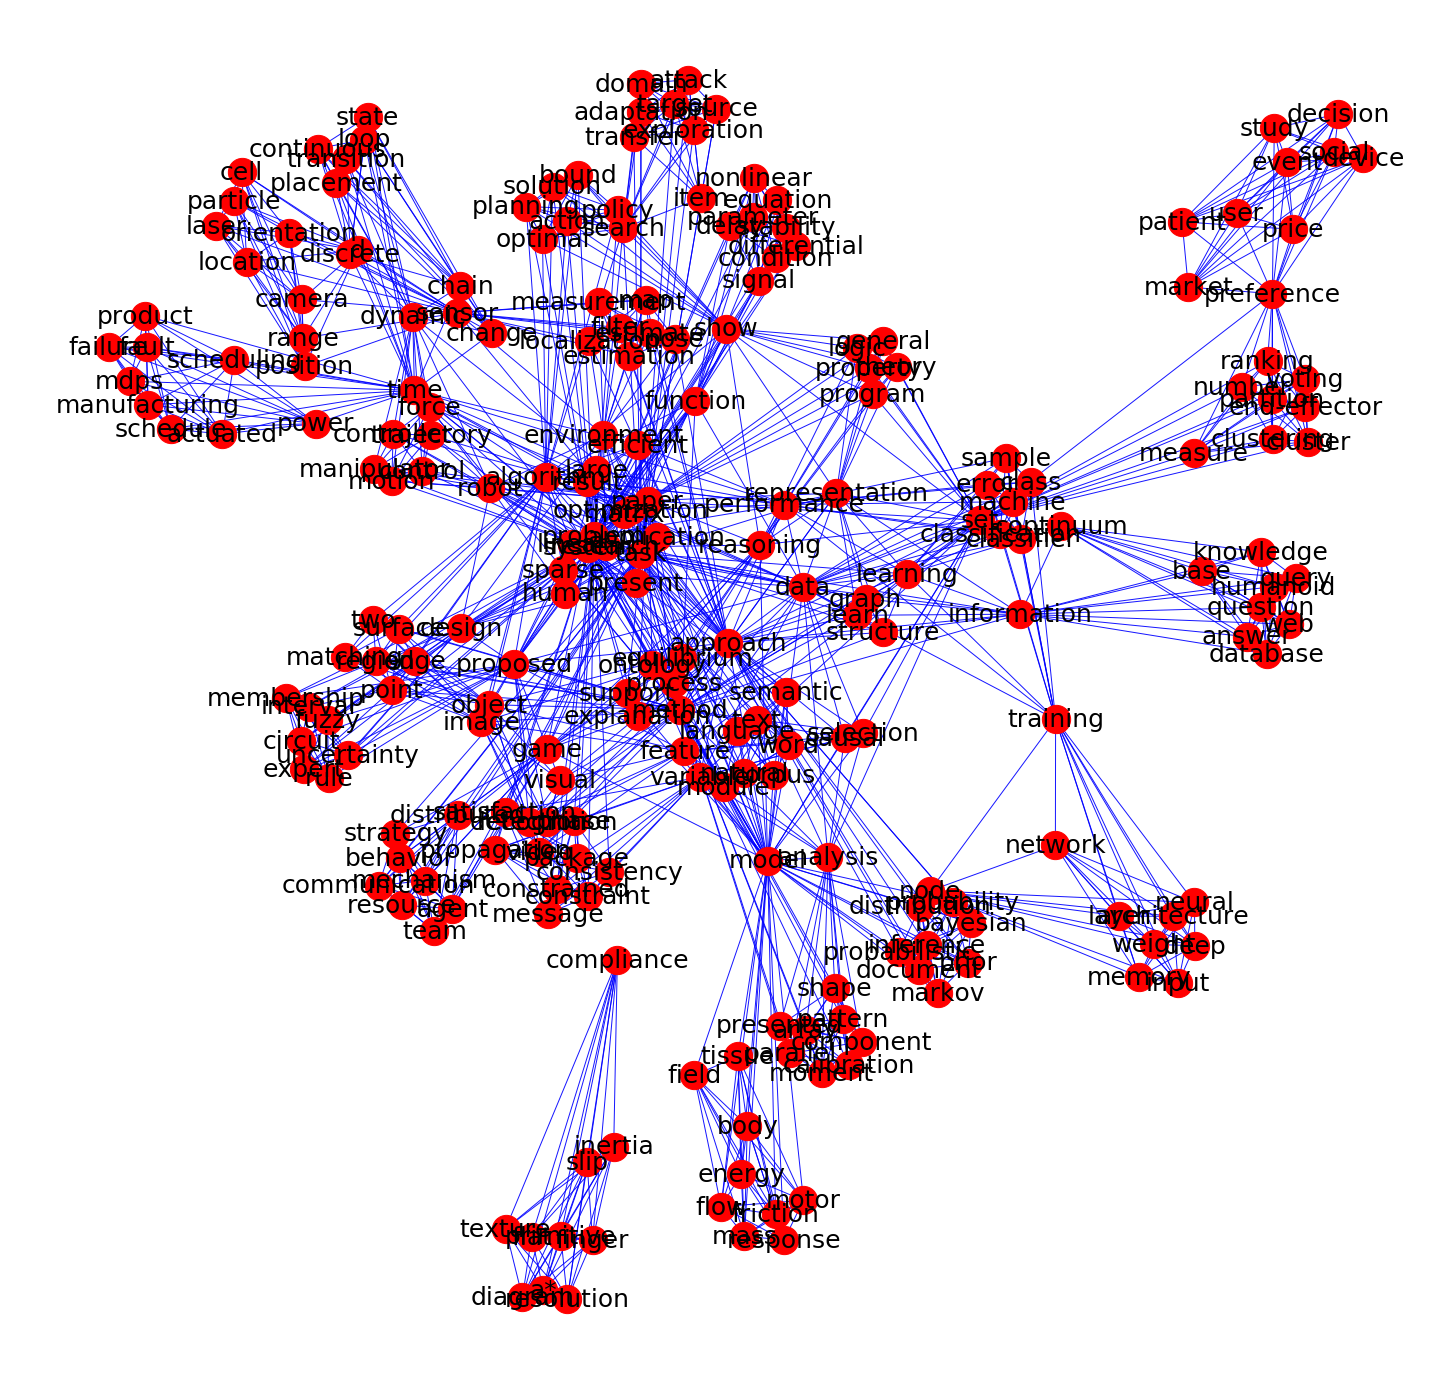

In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
network_file ='中国2019.gexf'
G = nx.read_gexf(path=network_file)
pos = nx.spring_layout(G,k=1.5*1/np.sqrt(len(G.nodes())), iterations=15)  
plt.figure(3, figsize=(25, 25))


#nx.draw_networkx(G, pos=pos, nodelist=["approach", "data"], node_size=3000)
nx.draw_networkx_nodes(G, pos, node_size=800)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.9, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=25, font_color='black')
plt.axis('off')
plt.show()

In [23]:
betweenness_centrality = nx.betweenness_centrality(G, k=15) 
betweenness_centrality

{'a*': 0.0,
 'action': 0.0,
 'actuated': 0.0,
 'adaptation': 0.0,
 'agent': 0.0,
 'algorithm': 0.019286612695596148,
 'analysis': 0.020700615341095432,
 'answer': 0.0,
 'application': 0.0,
 'approach': 0.21573655833703118,
 'architecture': 0.0,
 'array': 0.0,
 'attack': 0.0,
 'base': 0.0,
 'bayesian': 0.0,
 'behavior': 0.0,
 'body': 0.0,
 'bound': 0.0,
 'calibration': 0.0,
 'camera': 0.0,
 'causal': 0.0,
 'cell': 0.0,
 'chain': 0.0,
 'change': 0.0,
 'circuit': 0.0,
 'class': 0.0,
 'classification': 0.0,
 'classifier': 0.0,
 'cluster': 0.0,
 'clustering': 0.0,
 'communication': 0.0,
 'compliance': 0.0,
 'component': 0.0,
 'condition': 0.0,
 'consistency': 0.0,
 'constrained': 0.0,
 'constraint': 0.0,
 'continuous': 0.0,
 'continuum': 0.0,
 'control': 0.0,
 'controller': 0.0,
 'corpus': 0.0,
 'd': 0.0,
 'data': 0.09813367894691771,
 'database': 0.0,
 'decision': 0.0,
 'deep': 0.0,
 'delay': 0.0,
 'design': 0.004043725121739306,
 'detection': 0.0,
 'device': 0.0,
 'diagram': 0.0,
 'differ

110


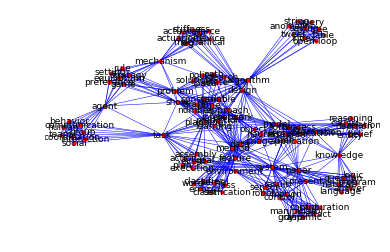

In [7]:
import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(1) 
n_of_rows=sheet_1_by_index.nrows 
list_set=[] 
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    list_set.append(danci)
new = sum(list_set,[])
node = list(set(new)) # 得到去重之后的全部单词，格式符合node节点！！！
print(len(node))


#####################################################
# 生成外部文件格式
import networkx as nx

G=nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)
nx.write_gexf(G,'会议.gexf')

#####################################################
import matplotlib.pyplot as plt
network_file ='会议.gexf'
G = nx.read_gexf(path=network_file)
#print(G.nodes()) #  测试
#print(G.edges()) #  测试 
pos = nx.spring_layout(G)  

nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=1, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=9, font_color='k')
plt.axis('off')
plt.show()

In [33]:
betweenness_centrality = nx.betweenness_centrality(G, k=15) 
betweenness_centrality

{'action': 0.0,
 'actuation': 0.0,
 'actuator': 0.0,
 'agent': 0.0370905673403125,
 'algorithm': 0.10944843562070883,
 'anomaly': 0.0,
 'answer': 0.0,
 'application': 0.0,
 'approach': 0.01832565661141944,
 'assembly': 0.0,
 'behavior': 0.0,
 'belief': 0.0,
 'causal': 0.0,
 'class': 0.0,
 'classification': 0.0,
 'classifier': 0.0,
 'communication': 0.0,
 'configuration': 0.0,
 'constraint': 0.0,
 'contact': 0.0,
 'control': 0.007900708703460997,
 'coordination': 0.0,
 'data': 0.17141675071508577,
 'decision': 0.0,
 'design': 0.09384450952578714,
 'device': 0.0,
 'dynamic': 0.0,
 'entity': 0.0,
 'environment': 0.011268465932074494,
 'equilibrium': 0.0,
 'error': 0.0,
 'event': 0.0,
 'execution': 0.0,
 'feature': 0.010762692210194758,
 'force': 0.0,
 'game': 0.0,
 'goal': 0.0,
 'graph': 0.0,
 'grasp': 0.0,
 'group': 0.0,
 'human': 0.0,
 'image': 0.0,
 'index': 0.0,
 'inference': 0.0,
 'information': 0.03933695235937846,
 'interaction': 0.0,
 'joint': 0.0,
 'kernel': 0.0,
 'knowledge': 0.

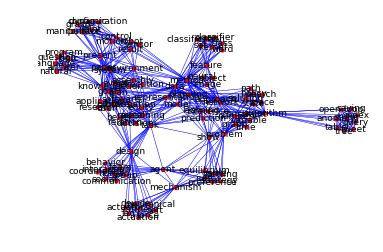

In [34]:
import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(1) 
n_of_rows=sheet_1_by_index.nrows 
f1 = open(r'会议配对.txt','w',encoding = 'utf-8')
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    cc = list(itertools.combinations(danci, 2))
    f1.write(str(cc))
f1.close()

# 生成 边数据edge
# 需要以下这样的格式
# edge=[['model', 'learning'], ['model', 'task']]
f2 = open(r'会议配对.txt','r',encoding = 'utf-8')
con1 = f2.read().replace("), (","],[")
con2 = con1.replace(")][(","],[")
con3 = con2.replace("[(","[") #开头
con4 = con3.replace(")]","]") #结尾
a=eval(con4)
edge=list(a)
f2.close()
#print(len(edge))

import xlrd
import itertools
data = xlrd.open_workbook("期刊-会议主题单词.xlsx")
sheet_1_by_index=data.sheet_by_index(1) 
n_of_rows=sheet_1_by_index.nrows 
list_set=[] 
for i in range(0,n_of_rows):
    danci = sheet_1_by_index.row_values(i)
    list_set.append(danci)
new = sum(list_set,[])
node = list(set(new)) # 得到去重之后的全部单词，格式符合node节点！！！


#####################################################
# 生成外部文件格式
import networkx as nx

G=nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)
nx.write_gexf(G,'会议.gexf')

#####################################################
import matplotlib.pyplot as plt
network_file ='会议.gexf'
G = nx.read_gexf(path=network_file)
#print(G.nodes()) #  测试
#print(G.edges()) #  测试 
pos = nx.spring_layout(G)  

nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=1, edge_color='b')
nx.draw_networkx_labels(G, pos, font_size=9, font_color='k')
plt.axis('off')
plt.show()

In [35]:
betweenness_centrality = nx.betweenness_centrality(G, k=15) 
betweenness_centrality

{'action': 0.0,
 'actuation': 0.0,
 'actuator': 0.0,
 'agent': 0.02579890943805317,
 'algorithm': 0.2183563545099393,
 'anomaly': 0.0,
 'answer': 0.0,
 'application': 0.0,
 'approach': 0.016266155724191742,
 'assembly': 0.0,
 'behavior': 0.0,
 'belief': 0.0,
 'causal': 0.0,
 'class': 0.0,
 'classification': 0.0,
 'classifier': 0.0,
 'communication': 0.0,
 'configuration': 0.0,
 'constraint': 0.0,
 'contact': 0.0,
 'control': 0.006856867789589503,
 'coordination': 0.0,
 'data': 0.15426231107083976,
 'decision': 0.0,
 'design': 0.046387064094335594,
 'device': 0.0,
 'dynamic': 0.0,
 'entity': 0.0,
 'environment': 0.004047201052807577,
 'equilibrium': 0.0,
 'error': 0.0,
 'event': 0.0,
 'execution': 0.0,
 'feature': 0.003304855751338932,
 'force': 0.0,
 'game': 0.0,
 'goal': 0.0,
 'graph': 0.0,
 'grasp': 0.0,
 'group': 0.0,
 'human': 0.0,
 'image': 0.0,
 'index': 0.0,
 'inference': 0.0,
 'information': 0.011092908111256735,
 'interaction': 0.0,
 'joint': 0.0,
 'kernel': 0.0,
 'knowledge':